In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(908, 25)

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [10]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

First prediction is for primary Fuel so target is primary fuel 

different dtypes are there so better to do label encoding 

In [16]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.0,908.0,908.00000,908.00000,908.000000,862.000000,862.000000,908.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,0.0,0.0,453.50000,453.50000,321.046378,21.196189,77.447848,3.205947,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,0.0,0.0,262.26132,262.26132,580.221767,6.248627,4.907260,2.281339,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.0,0.0,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.0,0.0,226.75000,226.75000,16.837500,16.771575,74.258975,1.000000,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,0.0,0.0,453.50000,453.50000,60.000000,21.778300,76.719250,3.000000,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,0.0,0.0,680.25000,680.25000,388.125000,25.516375,79.441475,6.000000,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,0.0,0.0,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [17]:
df['latitude'].fillna(int(df['latitude'].mean()), inplace=True)
print(df)

     country  country_long   name  gppd_idnr  capacity_mw  latitude  \
0        0.0           0.0    0.0      658.0          2.5   28.1839   
1        0.0           0.0    1.0      520.0         98.0   24.7663   
2        0.0           0.0    2.0      854.0         39.2   21.9038   
3        0.0           0.0    3.0        0.0        135.0   23.8712   
4        0.0           0.0    4.0        1.0       1800.0   21.9603   
..       ...           ...    ...        ...          ...       ...   
903      0.0           0.0  903.0      494.0       1600.0   16.2949   
904      0.0           0.0  904.0      823.0          3.0   12.8932   
905      0.0           0.0  905.0      892.0         25.5   15.2758   
906      0.0           0.0  906.0      540.0         80.0   24.3500   
907      0.0           0.0  907.0      877.0         16.5    9.9344   

     longitude  primary_fuel other_fuel1 other_fuel2  ...  \
0      73.2407           6.0         NaN         NaN  ...   
1      74.6090           

In [19]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [24]:
df['longitude'].fillna(int(df['longitude'].mean()), inplace=True)
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [25]:
df['commissioning_year'].fillna(int(df['commissioning_year'].mean()), inplace=True)
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [ ]:
we can drop few columns as this is related to primary fuel we can drop the columns 
owner as the owner type doesnt determine the fuel type 
other_fuel1,other_fuel2,other_fuel3 these fuels dont determine teh primary as primary fuel only will determin back teh other fuel                  

In [26]:
df.drop(['owner'], axis = 1, inplace = True)

In [28]:
df.drop(['other_fuel1'], axis = 1, inplace = True)

In [31]:
df.drop(['other_fuel2'], axis = 1, inplace = True)

In [32]:
df.drop(['other_fuel3'], axis = 1, inplace = True)

In [34]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [40]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

as geo location source is not detemining the priamyr fuel we can drop this 

In [41]:
df.drop(['geolocation_source'], axis = 1, inplace = True)

In [43]:
df.drop(['wepp_id'], axis = 1, inplace = True)         

In [44]:
df['year_of_capacity_data'].fillna(int(df['year_of_capacity_data'].mean()), inplace=True)
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
source                        0
url                           0
year_of_capacity_data         0
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [45]:
df['generation_gwh_2013'].fillna(int(df['generation_gwh_2013'].mean()), inplace=True)
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
source                        0
url                           0
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [46]:
df['generation_gwh_2014'].fillna(int(df['generation_gwh_2013'].mean()), inplace=True)
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
source                        0
url                           0
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [47]:
df['generation_gwh_2015'].fillna(int(df['generation_gwh_2013'].mean()), inplace=True)
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
source                        0
url                           0
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [48]:
df['generation_gwh_2016'].fillna(int(df['generation_gwh_2013'].mean()), inplace=True)
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
source                        0
url                           0
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [49]:
df['generation_gwh_2017'].fillna(int(df['generation_gwh_2013'].mean()), inplace=True)
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
source                        0
url                           0
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [50]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [51]:
df['generation_data_source'] = df['generation_data_source'].fillna('Central Electricity Authority')

In [52]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
source                        0
url                           0
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

In [53]:
df['estimated_generation_gwh'].unique()

array([nan])

as this column contains only nan we shall drop this column 

In [54]:

df.drop(['estimated_generation_gwh'], axis = 1, inplace = True)



In [55]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

There are no null columns

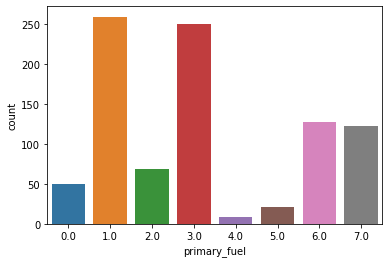

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="primary_fuel",data=df)
plt.show()

This is a Regression probnlem as the values are more than 2 

# Regression Problem 

In [57]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [58]:
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,9,731,143,6,65,109,128,0,252,250,262,268,261,0
1,0,0,1,520,180,594,234,1,50,174,173,0,252,250,262,268,261,0
2,0,0,2,854,122,421,8,7,50,21,205,0,252,250,262,268,261,0
3,0,0,3,0,204,547,808,2,58,22,58,0,158,157,198,199,178,0
4,0,0,4,1,345,424,704,1,69,22,58,0,228,275,351,362,341,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,340,177,482,1,70,22,58,0,252,250,3,99,195,0
904,0,0,904,823,10,104,554,6,50,77,22,0,252,250,262,268,261,0
905,0,0,905,892,81,152,312,7,50,21,260,0,252,250,262,268,261,0
906,0,0,906,540,169,572,167,1,50,59,82,0,252,250,262,268,261,0


In [80]:
df1.dtypes

country                   int64
country_long              int64
name                      int64
gppd_idnr                 int64
capacity_mw               int64
latitude                  int64
longitude                 int64
primary_fuel              int64
commissioning_year        int64
source                    int32
url                       int32
year_of_capacity_data     int64
generation_gwh_2013       int64
generation_gwh_2014       int64
generation_gwh_2015       int64
generation_gwh_2016       int64
generation_gwh_2017       int64
generation_data_source    int32
dtype: object

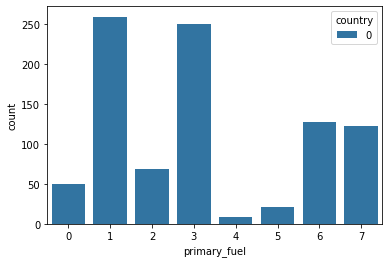

In [81]:

sns.countplot(x="primary_fuel",hue="country",data=df1)
plt.show()

as country is unique we shall drop this column 

In [82]:

df1.drop(['country'], axis = 1, inplace = True)


In [83]:

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='country_long', ylabel='Density'>

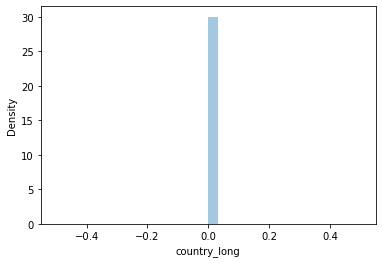

In [84]:
sns.distplot(df1['country_long'])

<AxesSubplot:xlabel='name', ylabel='Density'>

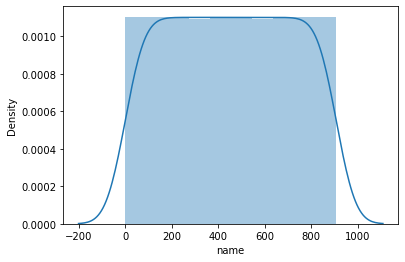

In [85]:
sns.distplot(df1['name'])

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

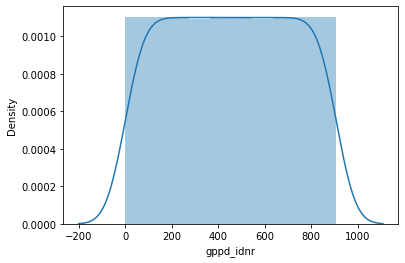

In [86]:
sns.distplot(df1['gppd_idnr'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

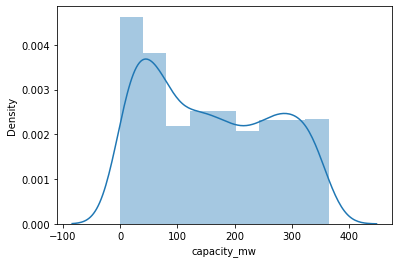

In [87]:
sns.distplot(df1['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

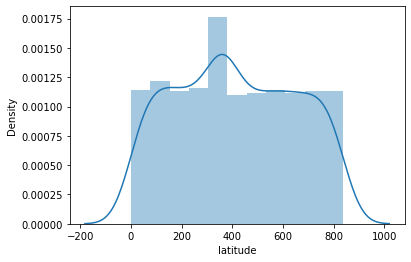

In [88]:
sns.distplot(df1['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

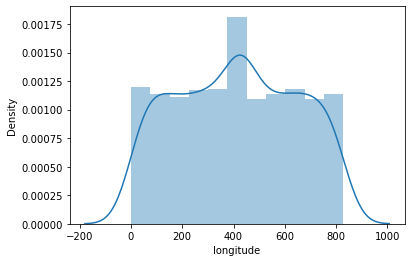

In [89]:
sns.distplot(df1['longitude'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

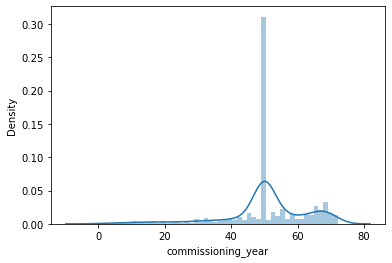

In [90]:
sns.distplot(df1['commissioning_year'])

 as source, column has only one data and url has no impoact we con drop that as well

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

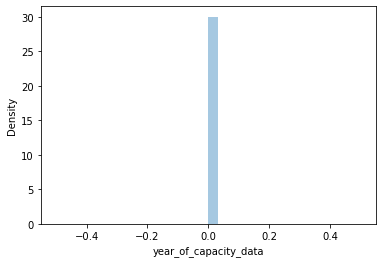

In [91]:
sns.distplot(df1['year_of_capacity_data'])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

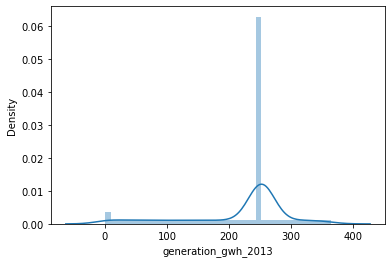

In [92]:
sns.distplot(df1['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

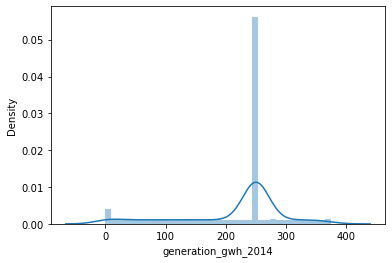

In [93]:
sns.distplot(df1['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

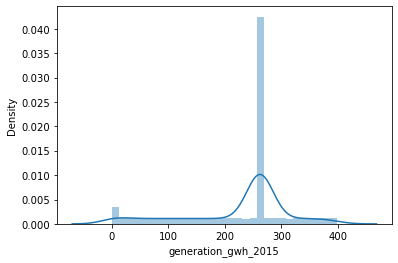

In [94]:
sns.distplot(df1['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

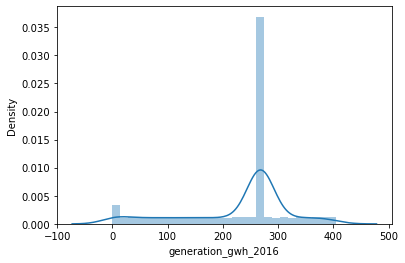

In [95]:
sns.distplot(df1['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

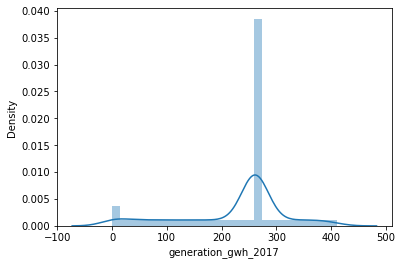

In [96]:
sns.distplot(df1['generation_gwh_2017'])

we can drop the  'generation_data_source'] as this alaos contains only one value

In [97]:

df1.drop(['generation_data_source'], axis = 1, inplace = True)

all the columns are not normally distributed 

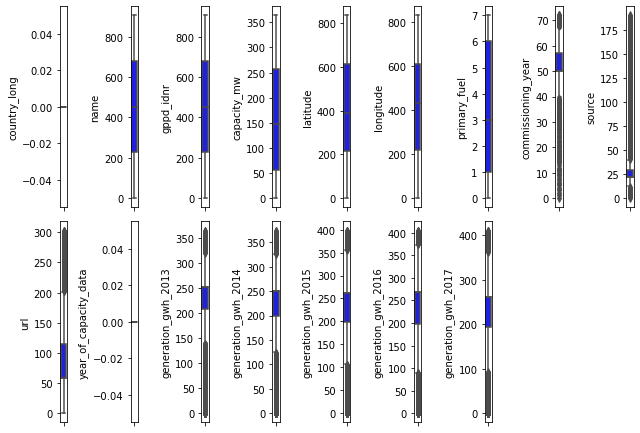

In [98]:
collist=df1.columns.values
ncol= 9
nrows= 9

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df1[collist[i]], color='blue', orient='x')
    plt.tight_layout()

commisioning_year , source, url,generation_gwh_2013,

generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 columns have outliers 

# TO remove the skewness¶

In [99]:
df1.skew()

country_long             0.000000
name                     0.000000
gppd_idnr                0.000000
capacity_mw              0.228620
latitude                 0.049777
longitude                0.001072
primary_fuel             0.471141
commissioning_year      -1.138265
source                   1.829145
url                      1.512258
year_of_capacity_data    0.000000
generation_gwh_2013     -1.302485
generation_gwh_2014     -1.177190
generation_gwh_2015     -1.065379
generation_gwh_2016     -1.037329
generation_gwh_2017     -0.936254
dtype: float64

In [100]:
cor=df1.corr()
cor

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,1.000000,0.336792,0.012749,-0.136241,0.033977,0.038752,-0.039119,-0.013801,0.042711,NaN,0.050131,0.049476,0.035951,0.032805,0.051261
gppd_idnr,NaN,0.336792,1.000000,-0.566669,-0.101351,-0.399362,0.607373,0.012067,0.416575,0.596994,NaN,0.354518,0.339736,0.327724,0.313237,0.275908
capacity_mw,NaN,0.012749,-0.566669,1.000000,0.080681,0.352094,-0.514198,0.280870,-0.393152,-0.349308,NaN,-0.027932,-0.001338,0.003404,0.010469,0.050239
latitude,NaN,-0.136241,-0.101351,0.080681,1.000000,-0.046356,0.005767,0.085845,0.055135,-0.128774,NaN,0.028773,0.067042,0.063062,0.087404,0.055872
longitude,NaN,0.033977,-0.399362,0.352094,-0.046356,1.000000,-0.391422,0.104196,-0.269345,-0.315456,NaN,-0.122781,-0.127393,-0.139408,-0.092369,-0.092906
primary_fuel,NaN,0.038752,0.607373,-0.514198,0.005767,-0.391422,1.000000,-0.141909,0.053609,0.589348,NaN,0.061180,0.053353,0.043342,0.037209,0.029107
commissioning_year,NaN,-0.039119,0.012067,0.280870,0.085845,0.104196,-0.141909,1.000000,0.001737,-0.011080,NaN,0.142177,0.154109,0.144939,0.181432,0.153836
source,NaN,-0.013801,0.416575,-0.393152,0.055135,-0.269345,0.053609,0.001737,1.000000,0.160379,NaN,0.201454,0.192669,0.189891,0.196228,0.179032
url,NaN,0.042711,0.596994,-0.349308,-0.128774,-0.315456,0.589348,-0.011080,0.160379,1.000000,NaN,0.213298,0.203997,0.201056,0.207765,0.189558


<AxesSubplot:>

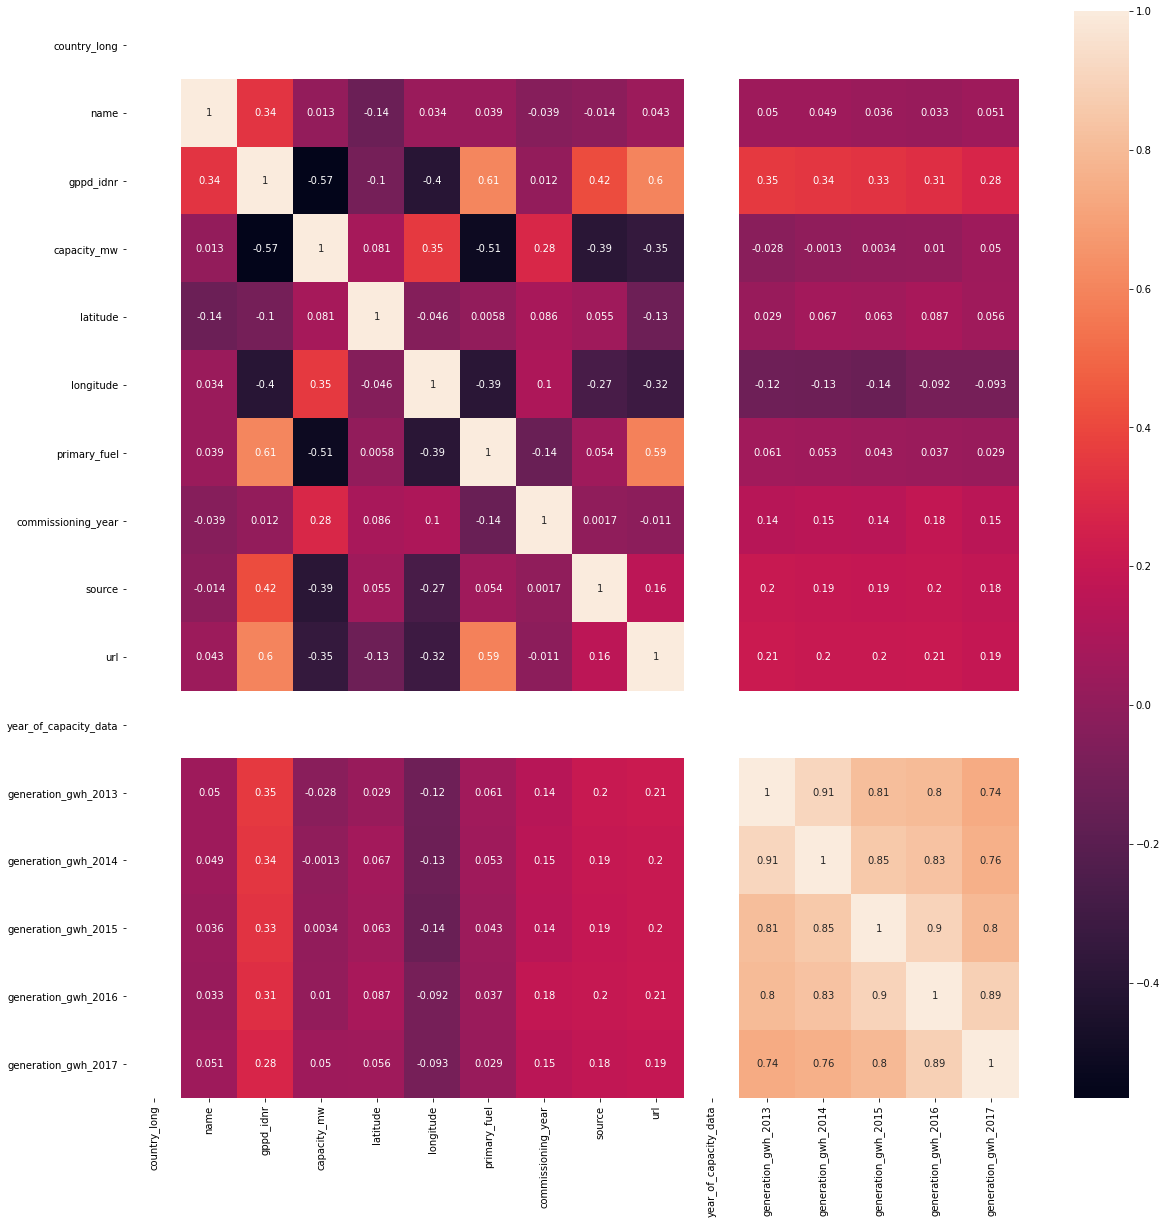

In [101]:
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

# Removing Outliers

In [105]:
from scipy.stats import zscore

z=np.abs(zscore(df1))

df2=df1[(z<3).all(axis=1)]

In [106]:
df2.shape

(0, 16)

In [107]:
df1.shape

(908, 16)

almost complete rows are removed so cant consider teh removal of outliers 

# Variance Inflation Factor to find multi collinearity

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
vif_data = pd.DataFrame()
vif_data["feature"] = df1.columns

In [110]:
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                            for i in range(len(df1.columns))]
print(vif_data)

                  feature        VIF
0            country_long        NaN
1                    name   5.366732
2               gppd_idnr  16.546051
3             capacity_mw   6.521872
4                latitude   4.266555
5               longitude   4.631029
6            primary_fuel   6.343147
7      commissioning_year  15.536016
8                  source   2.876035
9                     url   5.320592
10  year_of_capacity_data        NaN
11    generation_gwh_2013  49.651429
12    generation_gwh_2014  58.061873
13    generation_gwh_2015  47.741000
14    generation_gwh_2016  66.187026
15    generation_gwh_2017  32.558108


 generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and  generation_gwh_2017 has high multi collinearinty issues

Define Dependant and independent variable

In [111]:
df1

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,0,658,9,731,143,6,65,109,128,0,252,250,262,268,261
1,0,1,520,180,594,234,1,50,174,173,0,252,250,262,268,261
2,0,2,854,122,421,8,7,50,21,205,0,252,250,262,268,261
3,0,3,0,204,547,808,2,58,22,58,0,158,157,198,199,178
4,0,4,1,345,424,704,1,69,22,58,0,228,275,351,362,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,903,494,340,177,482,1,70,22,58,0,252,250,3,99,195
904,0,904,823,10,104,554,6,50,77,22,0,252,250,262,268,261
905,0,905,892,81,152,312,7,50,21,260,0,252,250,262,268,261
906,0,906,540,169,572,167,1,50,59,82,0,252,250,262,268,261


In [112]:

x=df1.drop('primary_fuel',axis=1)
y=df1['primary_fuel']

In [113]:

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=10)

In [115]:
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
pred_test=lr.predict(x_test)

In [117]:
print(r2_score(y_test,pred_test))

0.6143767821734836


In [134]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(lr, x_train, y_train, scoring='r2', cv=5)
scores.mean() 

0.5782620916240404

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [119]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [133]:

ls = Lasso(alpha=0.011,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.6143969567816169

In [121]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5544061976676831

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [123]:
rf= RandomForestRegressor(criterion="mse", max_features ="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 92.1714419953131
Cross Val Score: 91.13880434993604


In [124]:
train, validation = train_test_split(df, test_size=0.50, random_state = 5)

Best model prediction 
R2-CV score 
LinearRegression   61.43-57.82 = 3.61
Lasso Regresssion  61.43-55.44 = 5
RandomForestRegressor 92.17-91.13= 1.04

Random forest regressor has the least value hence fitting the random forest regressor model 





In [125]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=10, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestRegressor()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: nan (nan)


In [127]:
import pickle
filename = 'globalpower.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [129]:
loaded_model = pickle.load(open('globalpower.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.921714419953131


In [130]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orginal"])


In [131]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,0.51,2.97,3.0,1.0,7.0,3.45,6.44,7.0,7.0,2.86,...,7.0,1.0,1.16,7.0,1.34,6.0,6.0,3.34,7.0,6.0
Orginal,0.51,2.97,3.0,1.0,7.0,3.45,6.44,7.0,7.0,2.86,...,7.0,1.0,1.16,7.0,1.34,6.0,6.0,3.34,7.0,6.0


Predicted=Original

# Prediction for Capacity_mw


In [135]:
df1.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'commissioning_year', 'source', 'url',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [136]:

x1=df1.drop('capacity_mw',axis=1)
y1=df1['capacity_mw']

In [139]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.20, random_state=10)


In [140]:
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x1_train)
new_xtrain = norm_fit.transform(x1_train)
new_xtest = norm_fit.transform(x1_test)
# display values
print(new_xtrain)

[[0.         0.4553473  0.73812155 ... 0.65829146 0.6617284  0.63658537]
 [0.         0.10363837 0.06187845 ... 0.9321608  0.85432099 0.86097561]
 [0.         0.2646086  0.13922652 ... 0.65829146 0.6617284  0.63658537]
 ...
 [0.         0.58103638 0.30939227 ... 0.92462312 0.92098765 0.91707317]
 [0.         0.13781698 0.74475138 ... 0.65829146 0.6617284  0.63658537]
 [0.         0.292172   0.75248619 ... 0.65829146 0.6617284  0.63658537]]


# Linear Regression Model¶


In [158]:
lr1.fit(x1_train,y1_train)


LinearRegression()

In [160]:
lr1.score(x1_train,y1_train)


0.5465482753338844

In [161]:
pred_test=lr1.predict(x1_test)


In [162]:
print(r2_score(y1_test,pred_test))


0.5057232836635126


In [147]:
from sklearn.model_selection import cross_val_score
cvscoreslr= cross_val_score(lr1,x1_train,y1_train, scoring = 'r2', cv =2)

In [148]:
cvscoreslr


array([0.53675243, 0.50783436])

# Lasso Regression model¶


In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [152]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls1 = Lasso()
clf = GridSearchCV(ls1,parameters)
clf.fit(x1_train,y1_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [163]:
ls1 = Lasso(alpha=1)
ls1.fit(x1_train,y1_train)
ls1.score(x1_train,y1_train)

0.54651033742447

In [164]:

cv_score=cross_val_score(ls1,x1,y1,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5144939447094308

In [165]:
pred_testls=ls1.predict(x1_test)


In [166]:
print(r2_score(y1_test,pred_testls))


0.5063931291384987


# Random Forest Regressor Model¶


In [169]:
parameters = {'criterion':['mse'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x1_train,y1_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [170]:
rf= RandomForestRegressor(criterion="mse", max_features ="log2")
rf.fit(x1_train, y1_train)
rf.score(x1_train, y1_train)
pred_decision = rf.predict(x1_test)

rfs = r2_score(y1_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x1,y1,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 78.50033116092796
Cross Val Score: 83.20337495487055


In [171]:
rf.score(x1_train,y1_train)

0.9807776221909911

In [172]:
train, validation = train_test_split(df, test_size=0.50, random_state = 5)

Difference between R2 score and CV score

Linear Regression = 50.57- 54.65 = 4.08

Lasso regression = 50.63-51.44= -0.41

RandomForestRegressor = 78.5-83.2 =-4.7



# Lasso regression has the least difference hence we can consider that model 

In [177]:
import pickle
filename = 'globalcapacity.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [178]:
loaded_model = pickle.load(open('globalcapacity.pkl', 'rb'))
result = loaded_model.score(x1_test, y1_test)
print(result)


0.7850033116092795


In [179]:
conclusion=pd.DataFrame([loaded_model.predict(x1_test)[:],pred_decision[:]],index=["Predicted","Orginal"])


In [180]:
conclusion


,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,103.32,121.67,120.03,354.2,52.0,115.72,75.32,124.33,90.18,46.16,...,126.4,313.07,262.81,101.69,134.83,22.2,49.2,150.13,16.83,32.68
Orginal,103.32,121.67,120.03,354.2,52.0,115.72,75.32,124.33,90.18,46.16,...,126.4,313.07,262.81,101.69,134.83,22.2,49.2,150.13,16.83,32.68


Predicted = original 